In [1]:
import pickle
import os
import pandas as pd
import seaborn as sns

In [2]:
results = []
for dock_id in os.listdir('gold_docking_postprocessing') :
    result_path = os.path.join('gold_docking_postprocessing', dock_id, 'results.p')
    if os.path.exists(result_path) :
        with open(result_path, 'rb') as f :
            result_d = pickle.load(f)
            results.append(result_d)

In [3]:
len(results)

150

In [4]:
rankers = ['score', 'energy', 'model_scaffold_split', 'model_random_split']
df = pd.DataFrame()
for result in results :
    for ranker in rankers :
        result['ranking'][ranker]['ranker'] = ranker
        df = df.append(result['ranking'][ranker], ignore_index=True)

In [5]:
df.head()

,best_pose,docking_power,min_rmsd,min_rmsd_top_pose,ranker,top_score,top_score_pose
0,None,1.0,0.380303,0.435300,score,84.8007,None
1,None,1.0,0.380303,0.435300,energy,84.8007,None
2,None,1.0,0.380303,0.435300,model_scaffold_split,84.8007,None
3,None,1.0,0.380303,0.491323,model_random_split,82.7452,None
4,<rdkit.Chem.rdchem.Mol object at 0x7fc02db74ef0>,0.0,6.788492,9.975353,score,78.9477,<rdkit.Chem.rdchem.Mol object at 0x7fc06c4197b0>


<AxesSubplot:xlabel='ranker', ylabel='top_score'>

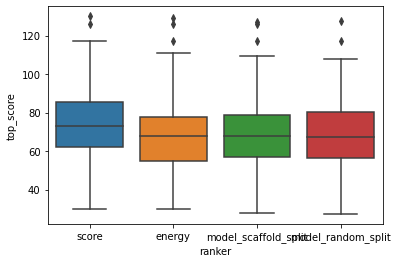

In [6]:
sns.boxplot(data=df, x='ranker', y='top_score')

<AxesSubplot:xlabel='ranker', ylabel='min_rmsd'>

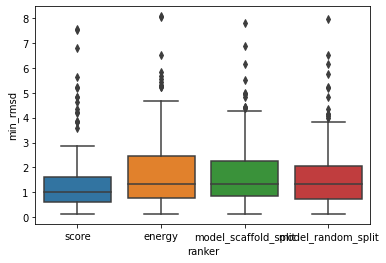

In [7]:
sns.boxplot(data=df, x='ranker', y='min_rmsd')

<AxesSubplot:xlabel='ranker', ylabel='docking_power'>

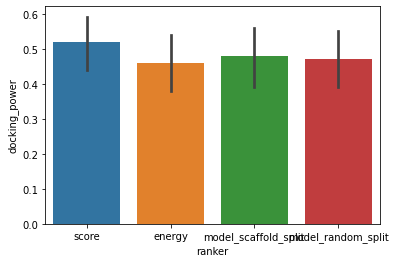

In [8]:
sns.barplot(data=df, x='ranker', y='docking_power')